In [1]:
# Import Necessary Libraries
import warnings  # To suppress warnings
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For advanced visualizations
import matplotlib.pyplot as plt  # For plotting basic visualizations
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # For encoding
import os  # For file handling
import category_encoders as ce
# Suppress warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Dataset

df = pd.read_csv(r"C:\Users\salma\Desktop\dalya\codes\eyouth project\Students_Grading_Dataset.csv")

In [3]:
# Initial Data Exploration

print("Dataset Shape:", df.shape)  # Output: (number of rows, number of columns)

# print head
print("\nFirst 5 Rows:")
df.head()

Dataset Shape: (5000, 23)

First 5 Rows:


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [17]:
# Check for Datatypes

print("\nColumn Data Types:")
print(df.dtypes)


Column Data Types:
Gender                         object
Age                             int64
Department                     object
Attendance (%)                float64
Midterm_Score                 float64
Final_Score                   float64
Assignments_Avg               float64
Quizzes_Avg                   float64
Participation_Score           float64
Projects_Score                float64
Total_Score                   float64
Grade                          object
Study_Hours_per_Week          float64
Extracurricular_Activities     object
Internet_Access_at_Home        object
Parent_Education_Level         object
Family_Income_Level            object
Stress_Level (1-10)             int64
Sleep_Hours_per_Night         float64
dtype: object


In [18]:
# Check for Duplicates and Drop Duplicates.
duplicate_count = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_count)
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicate rows found.")



Number of Duplicate Rows: 0
No duplicate rows found.


In [4]:
# drop unnecessary columns
df.drop(columns=['Student_ID', 'First_Name' , 'Last_Name' , 'Email'], inplace=True)

In [19]:
# view statistical measures for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,21.048400,1.989786,18.00,19.0000,21.000,23.0000,24.00
Attendance (%),4484.0,75.431409,14.372446,50.01,63.2650,75.725,87.4725,100.00
Midterm_Score,5000.0,70.326844,17.213209,40.00,55.4575,70.510,84.9700,99.98
Final_Score,5000.0,69.640788,17.238744,40.00,54.6675,69.735,84.5000,99.98
Assignments_Avg,4483.0,74.798673,14.411799,50.00,62.0900,74.810,86.9700,99.98
Quizzes_Avg,5000.0,74.910728,14.504281,50.03,62.4900,74.695,87.6300,99.96
Participation_Score,5000.0,4.980024,2.890136,0.00,2.4400,4.955,7.5000,10.00
Projects_Score,5000.0,74.924860,14.423415,50.01,62.3200,74.980,87.3675,100.00
Total_Score,5000.0,75.121804,14.399941,50.02,62.8350,75.395,87.6525,99.99
Study_Hours_per_Week,5000.0,17.658860,7.275864,5.00,11.4000,17.500,24.1000,30.00


In [20]:
# For categorial columns show the number and names of categories in each one
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} categories: {df[col].unique()}")

Gender: 2 categories: ['Female' 'Male']
Department: 4 categories: ['Engineering' 'Business' 'Mathematics' 'CS']
Grade: 5 categories: ['F' 'A' 'D' 'B' 'C']
Extracurricular_Activities: 2 categories: ['No' 'Yes']
Internet_Access_at_Home: 2 categories: ['Yes' 'No']
Parent_Education_Level: 4 categories: ['High School' nan "Master's" 'PhD' "Bachelor's"]
Family_Income_Level: 3 categories: ['Medium' 'Low' 'High']


In [21]:
#Check for null values.
null_values = df.isnull().sum()
print(null_values)

Gender                           0
Age                              0
Department                       0
Attendance (%)                 516
Midterm_Score                    0
Final_Score                      0
Assignments_Avg                517
Quizzes_Avg                      0
Participation_Score              0
Projects_Score                   0
Total_Score                      0
Grade                            0
Study_Hours_per_Week             0
Extracurricular_Activities       0
Internet_Access_at_Home          0
Parent_Education_Level        1794
Family_Income_Level              0
Stress_Level (1-10)              0
Sleep_Hours_per_Night            0
dtype: int64


In [22]:
# Calculate Null Ratio
null_ratio = (df.isnull().sum() / len(df)) * 100

# Display null ratio
print(null_ratio)

Gender                         0.00
Age                            0.00
Department                     0.00
Attendance (%)                10.32
Midterm_Score                  0.00
Final_Score                    0.00
Assignments_Avg               10.34
Quizzes_Avg                    0.00
Participation_Score            0.00
Projects_Score                 0.00
Total_Score                    0.00
Grade                          0.00
Study_Hours_per_Week           0.00
Extracurricular_Activities     0.00
Internet_Access_at_Home        0.00
Parent_Education_Level        35.88
Family_Income_Level            0.00
Stress_Level (1-10)            0.00
Sleep_Hours_per_Night          0.00
dtype: float64


<Axes: >

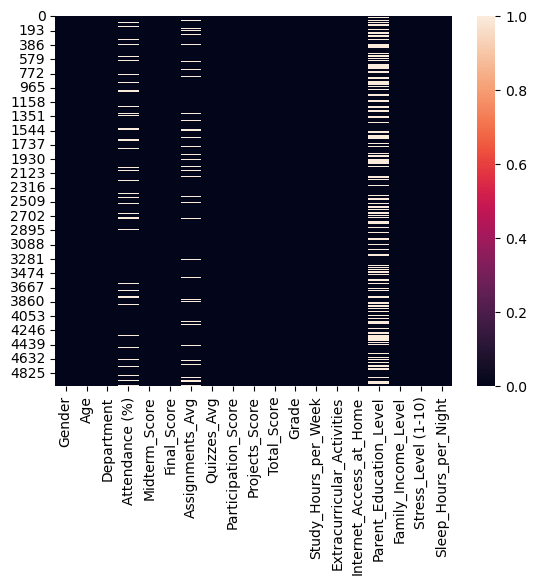

In [30]:
sns.heatmap(df.isnull())

Observations:-

No Missing Values in Most Performance-Related Columns (Midterm, Final, Quizzes, Participation, Projects, Total Score, and Grade)
This means student performance data is intact, making analysis of academic performance reliable.

Attendance (%) → 516 missing (~10%).
Assignments_Avg → 517 missing (~10%).
These two have moderate missingness. they might be related, perhaps missing attendance records correspond to missing assignments.
Could be missing due to students dropping out or data collection issues.
Possible Fix: Use KNN imputation

Parent_Education_Level → 1794 missing (~37%).
This column has high missingness. It is substantial and may not be missing at random (MNAR). People may have intentionally skipped this question.
Since this is a categorical variable, it may be better to create a "Missing" category instead of imputation.



<h1>EDA:univariate analysis

In [23]:
# target variable:-

# Count the occurrences of each category in the 'Grade' column
Grade_counts = df['Grade'].value_counts()
Grade_counts

Grade
A    1495
B     978
D     889
F     844
C     794
Name: count, dtype: int64

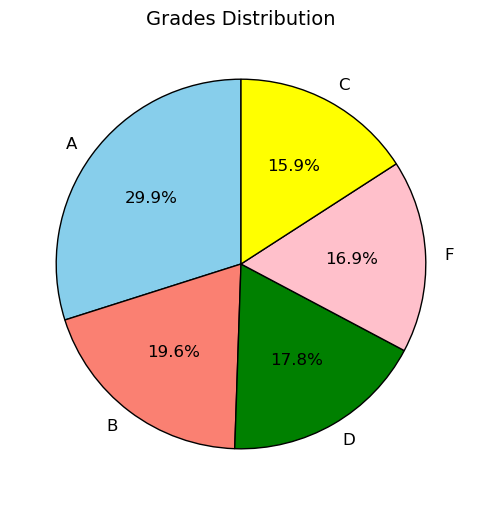

In [24]:
# Define labels and sizes for the pie chart
labels = Grade_counts.index.astype(str)  # Convert labels to strings for better visualization
sizes = Grade_counts.values  # Extract counts

# Create a pie chart
plt.figure(figsize=(6, 6))  # Set figure size
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon' , 'green' , 'pink' , 'yellow'], 
        wedgeprops={'edgecolor': 'black'}, textprops={'fontsize': 12})

# Add a title
plt.title('Grades Distribution', fontsize=14)

# Display the chart
plt.show()


observations:-

Majority of Students Score Well (A & B)

'A' Grade (29.9%) is the most common, indicating that a significant portion of students perform exceptionally well.
'B' Grade (19.6%) also has a strong presence, meaning a good number of students achieve above-average results.

Moderate Percentage in Lower Grades (D & F)

'D' Grade (17.8%) and 'F' Grade (16.9%) suggest that over one-third of students struggle academically.
This might indicate a need for intervention strategies to help underperforming students improve.

'C' Grade (15.9%) Represents the Middle Ground

'C' students make up a smaller portion compared to the 'A' and 'B' groups.
This could mean that students either excel or struggle, with fewer sitting in the middle.

Potential Actions to Improve Performance:-

1 - Support for Struggling Students (D & F Grades)

Implement tutoring, mentorship programs, and targeted learning strategies.
Identify common challenges (low attendance, lack of resources, ineffective study habits, etc.).

2 - Encourage C-Grade Students to Improve

Provide additional practice materials and motivation to push them toward B or A.
Use personalized learning techniques to cater to different learning styles.

3 - Sustain High Performance (A & B Grades)

Recognize and reward high-achieving students to maintain motivation.
Challenge them with advanced learning materials and extracurricular academic activities.

Final Thoughts:-
The distribution shows strong student performance overall, but there’s a noticeable portion at risk of failing. A well-balanced academic support system can help reduce the F/D group and move more students into A/B territory. 

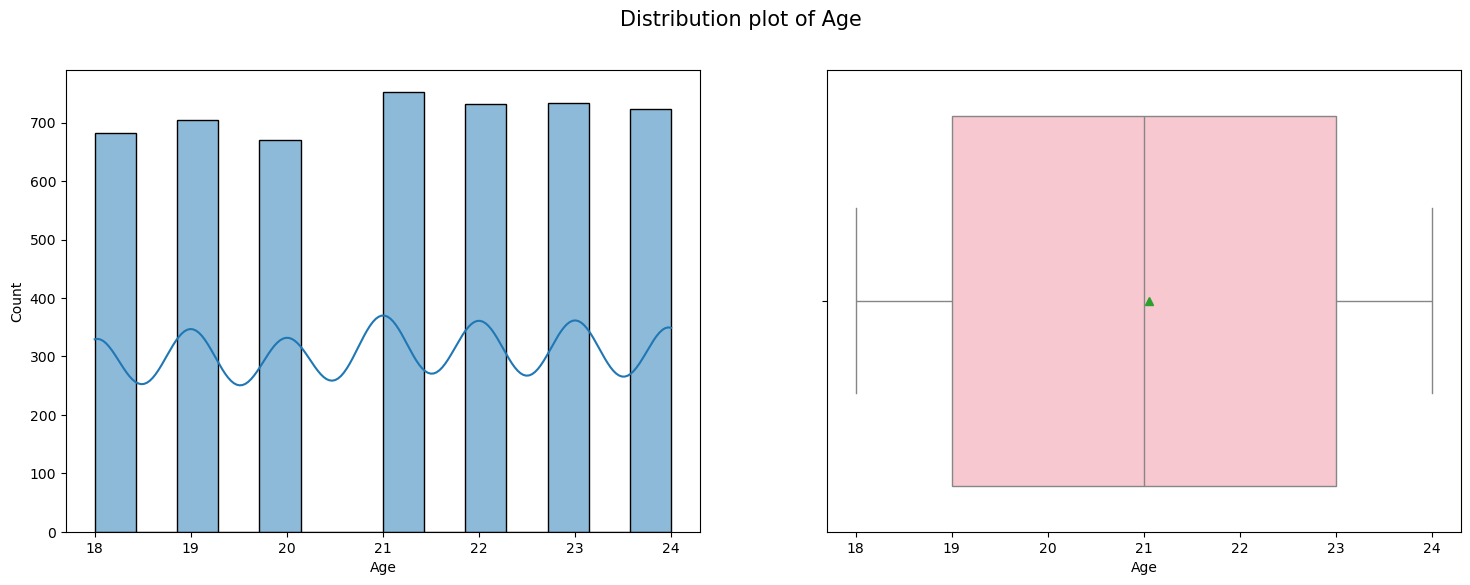

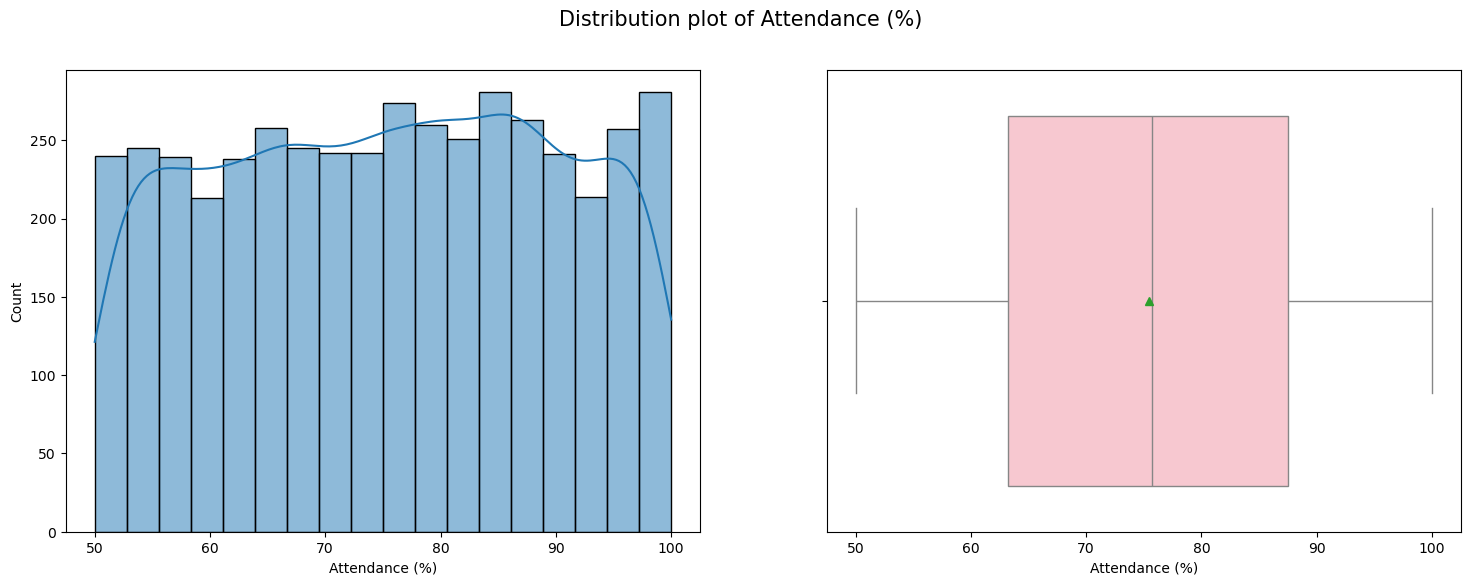

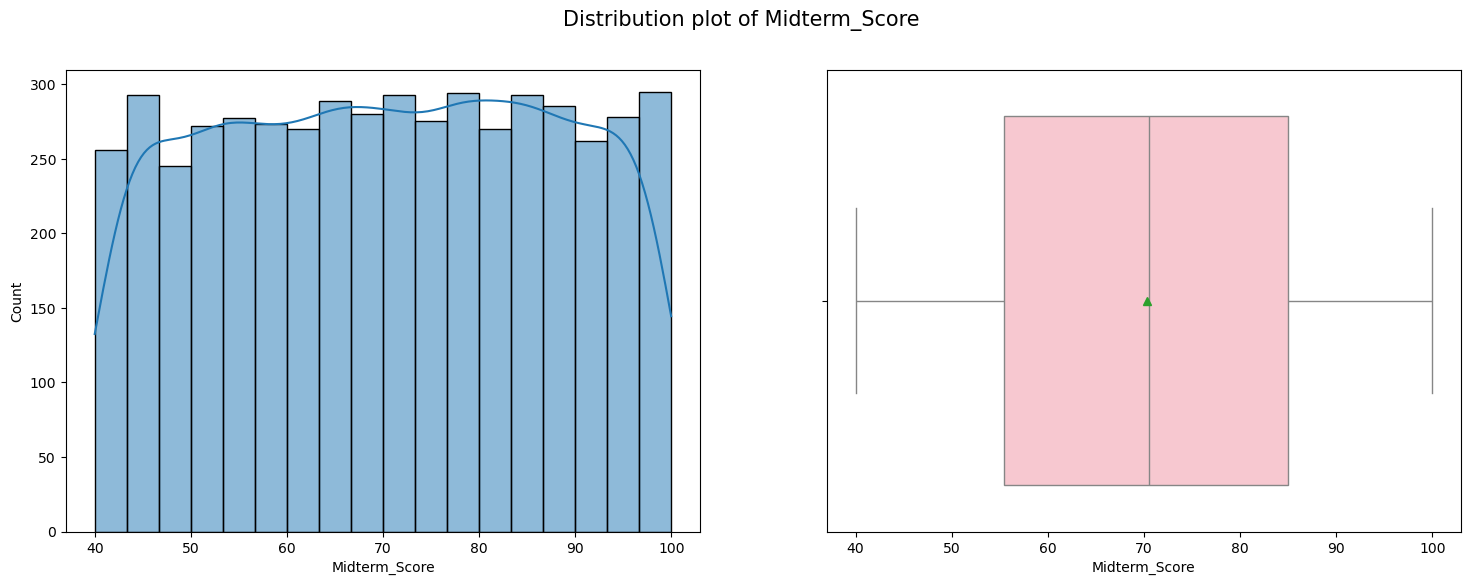

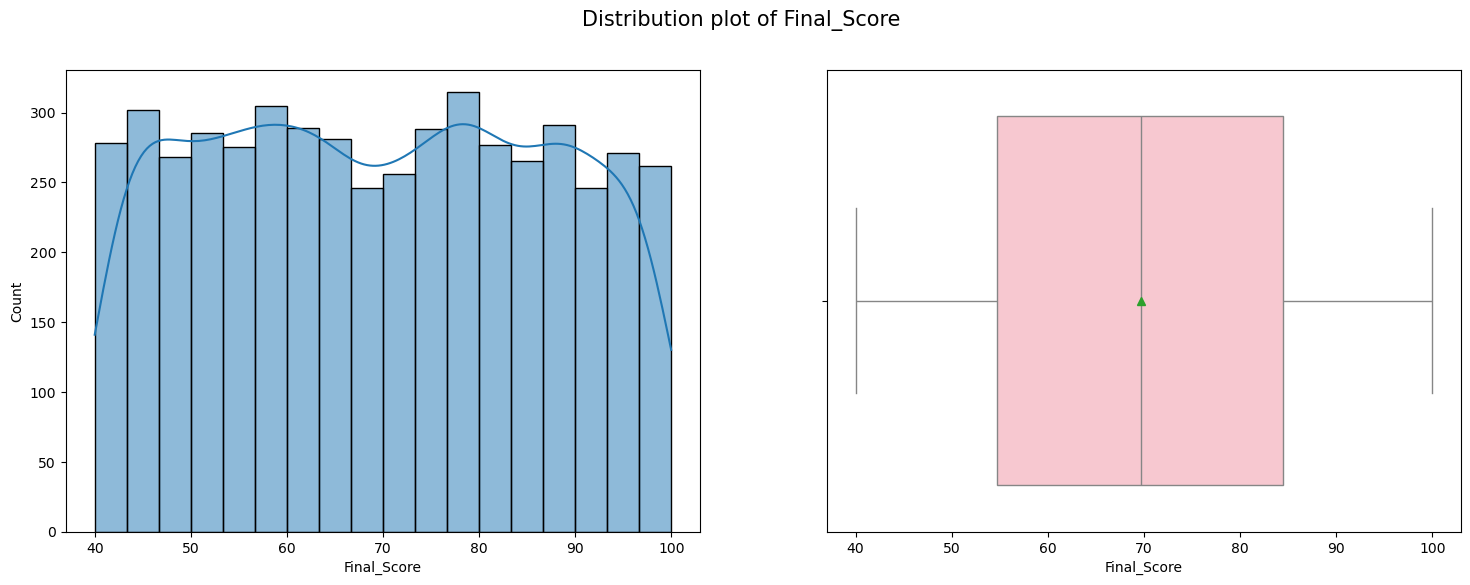

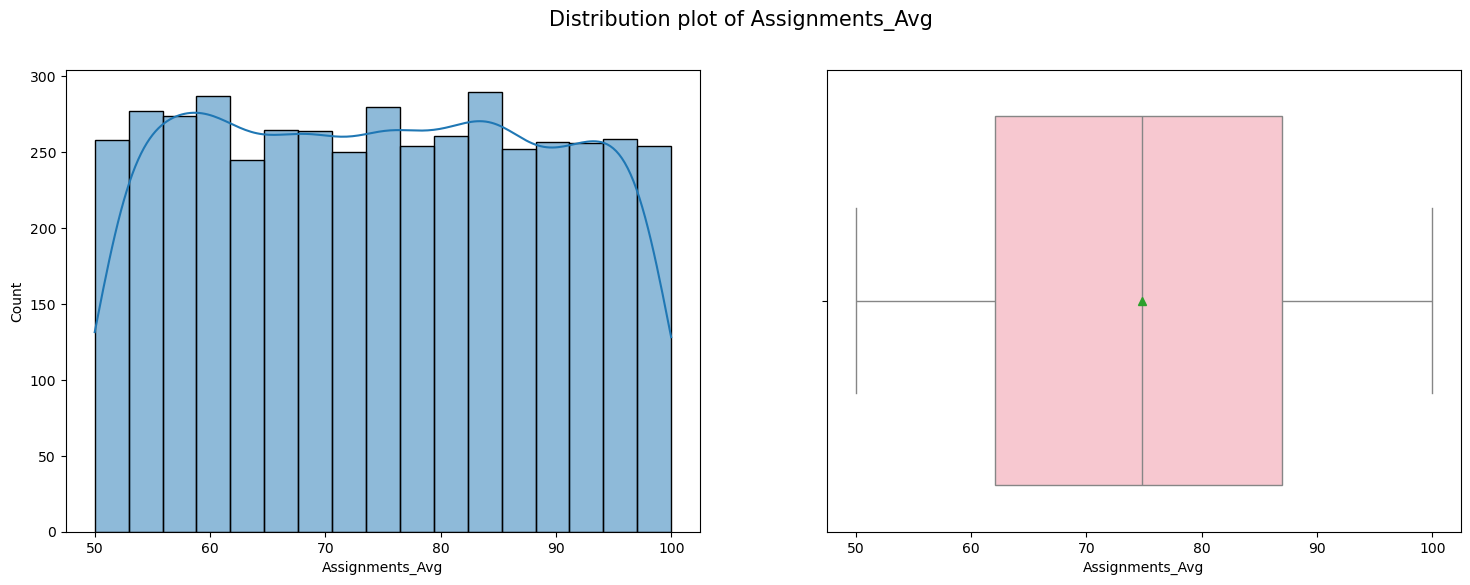

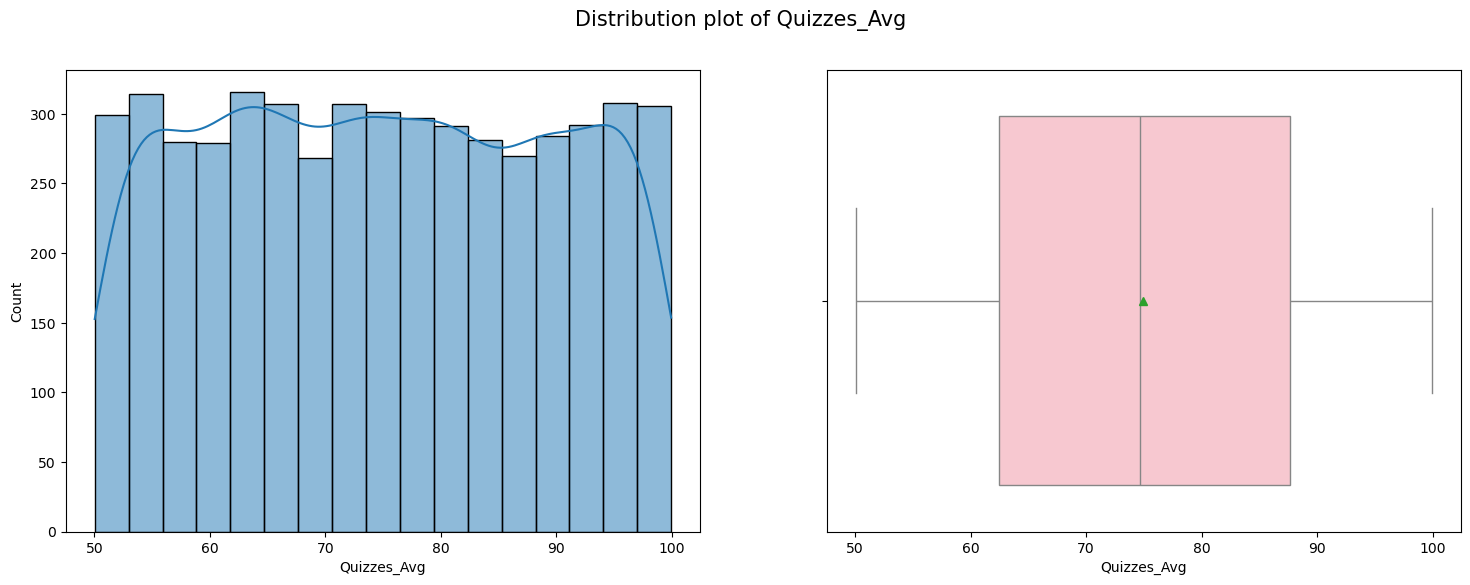

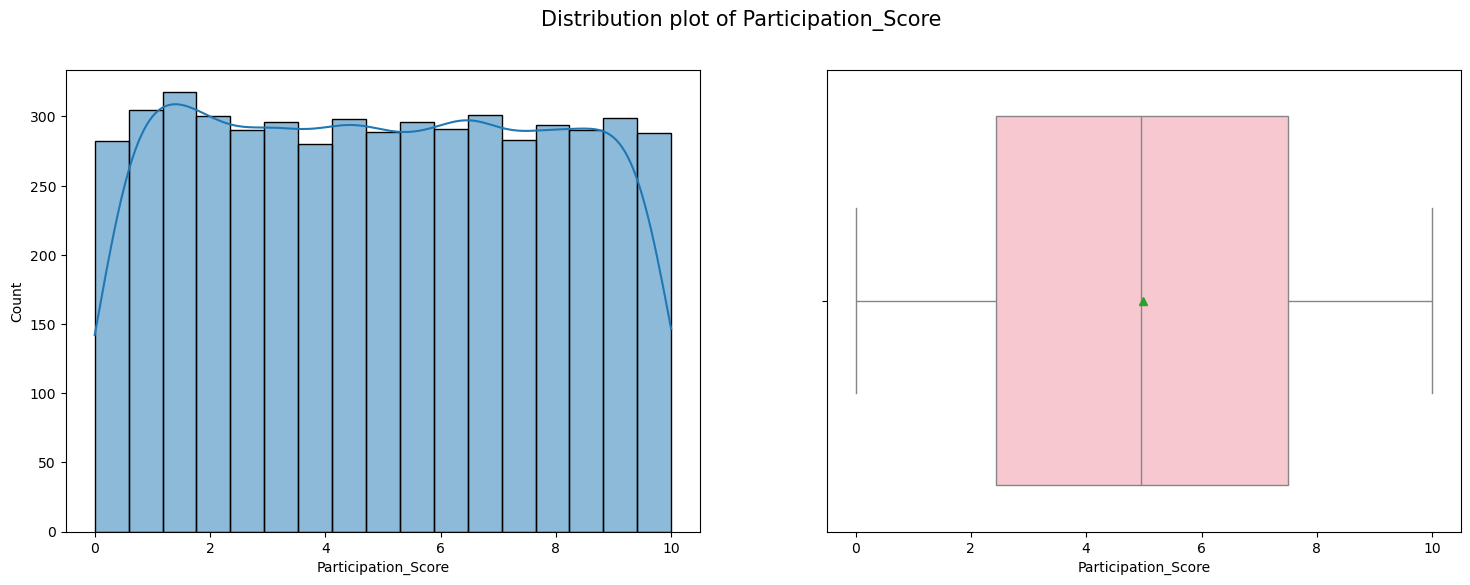

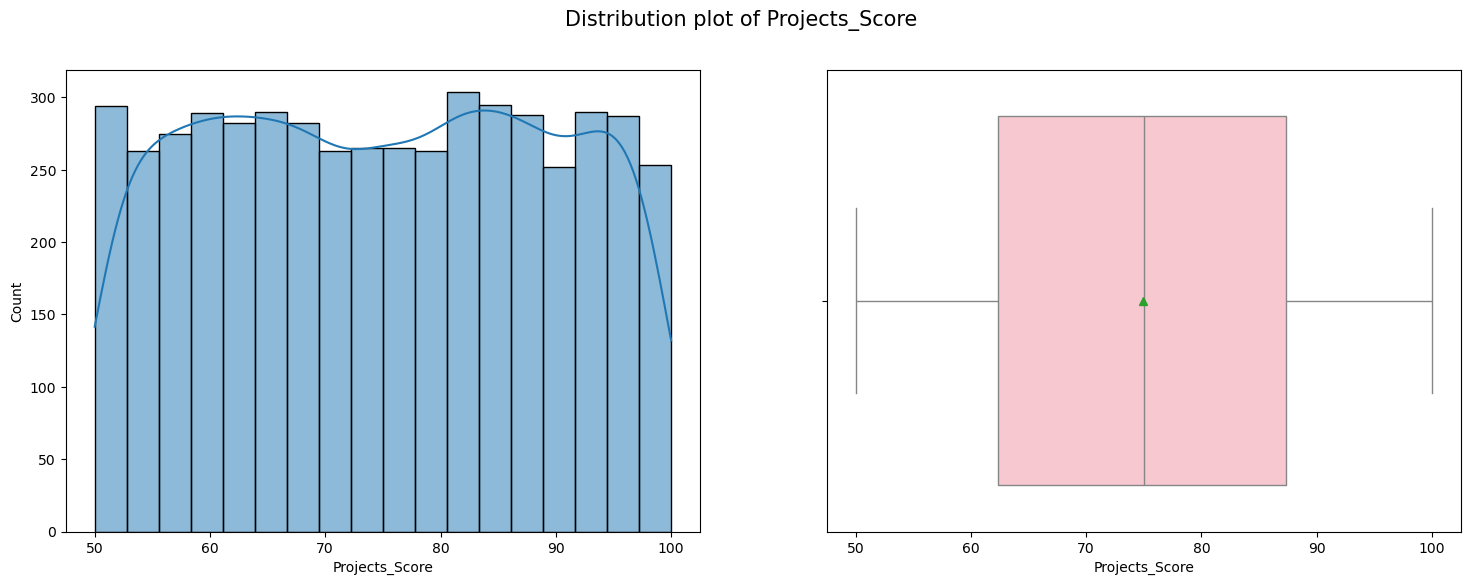

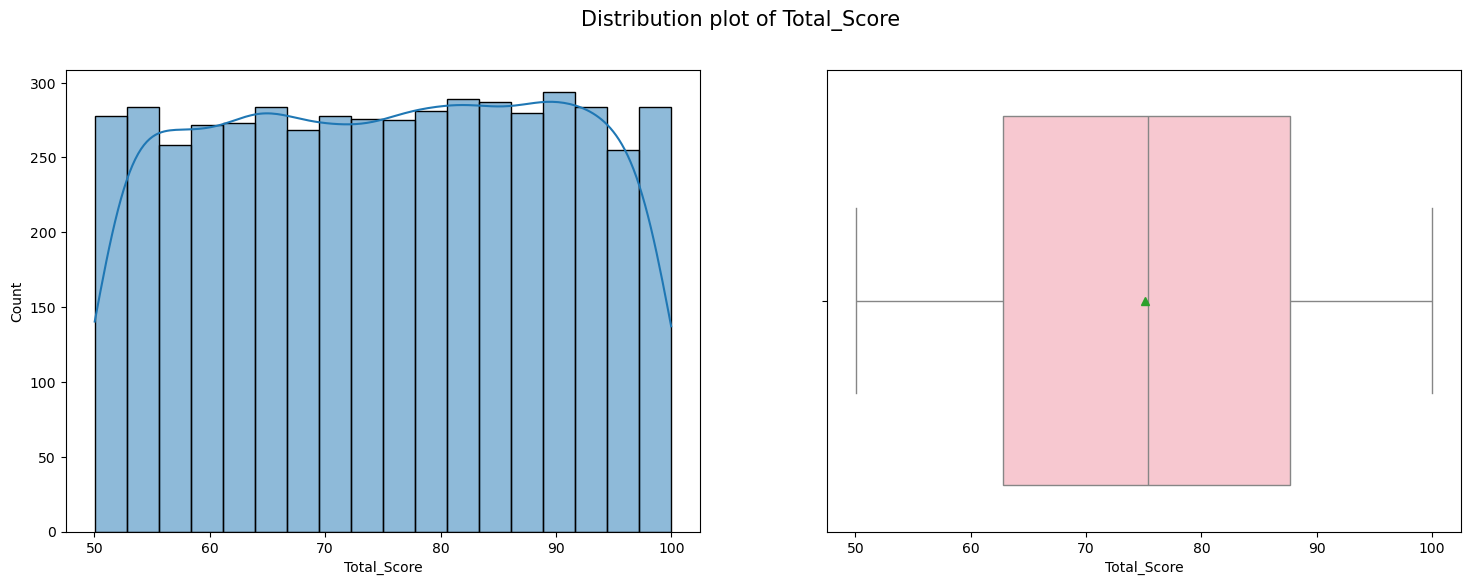

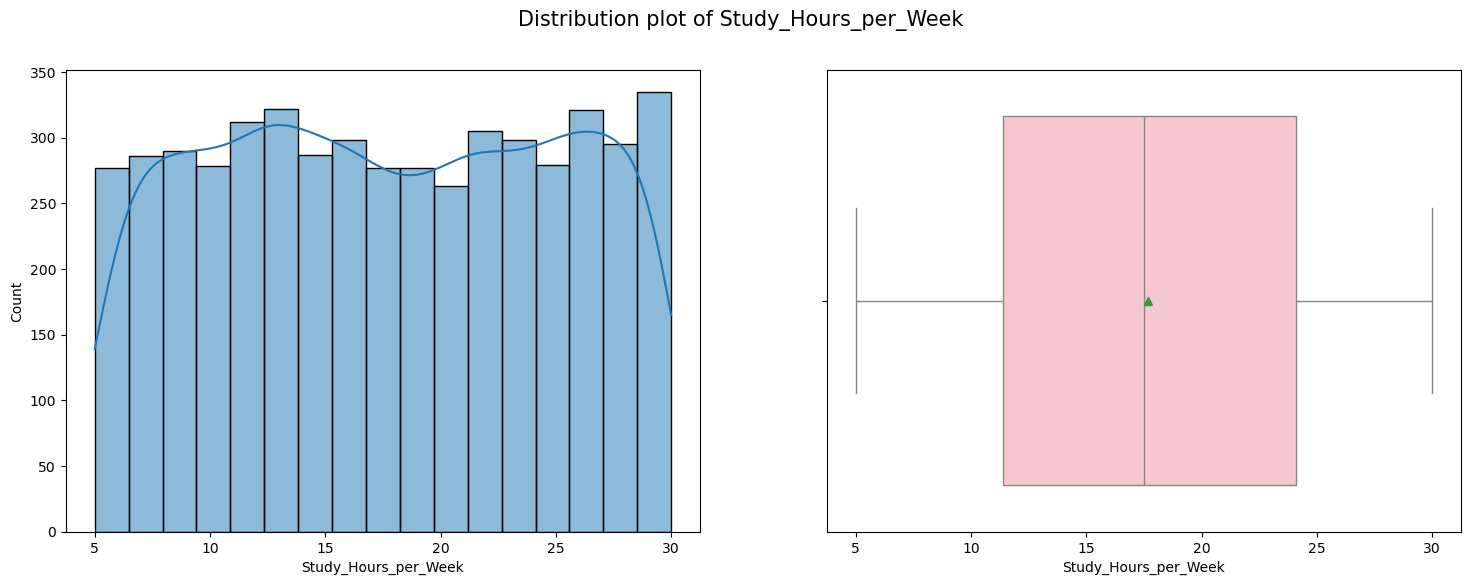

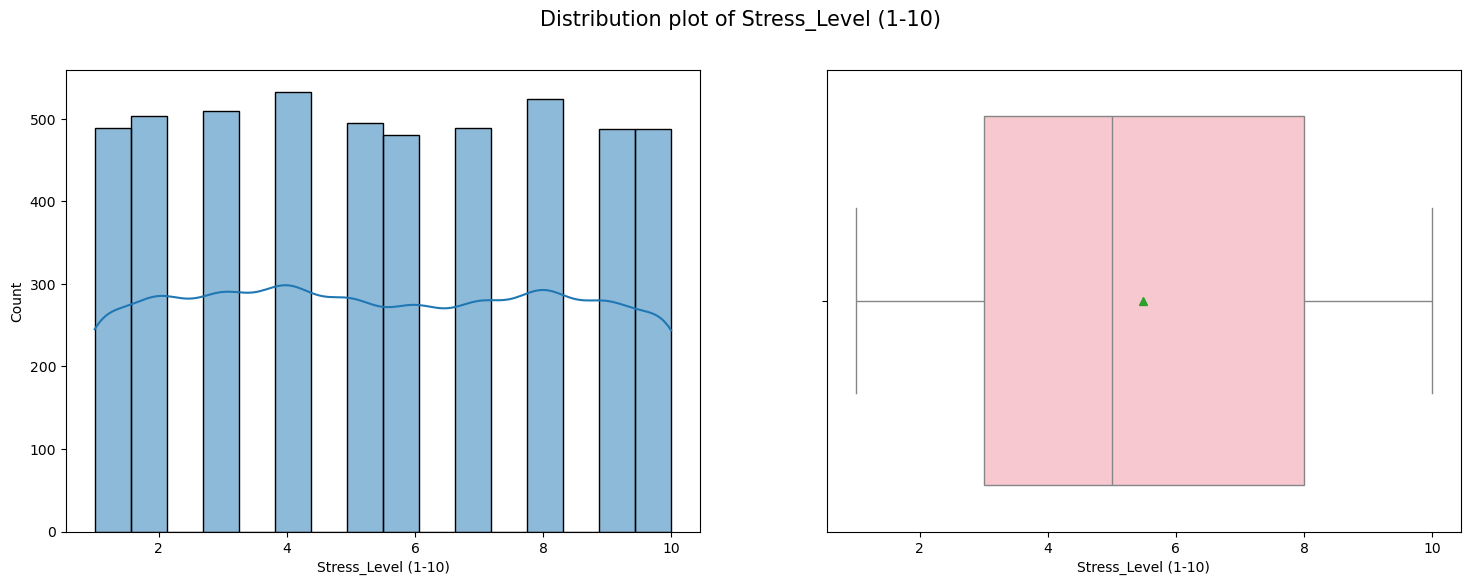

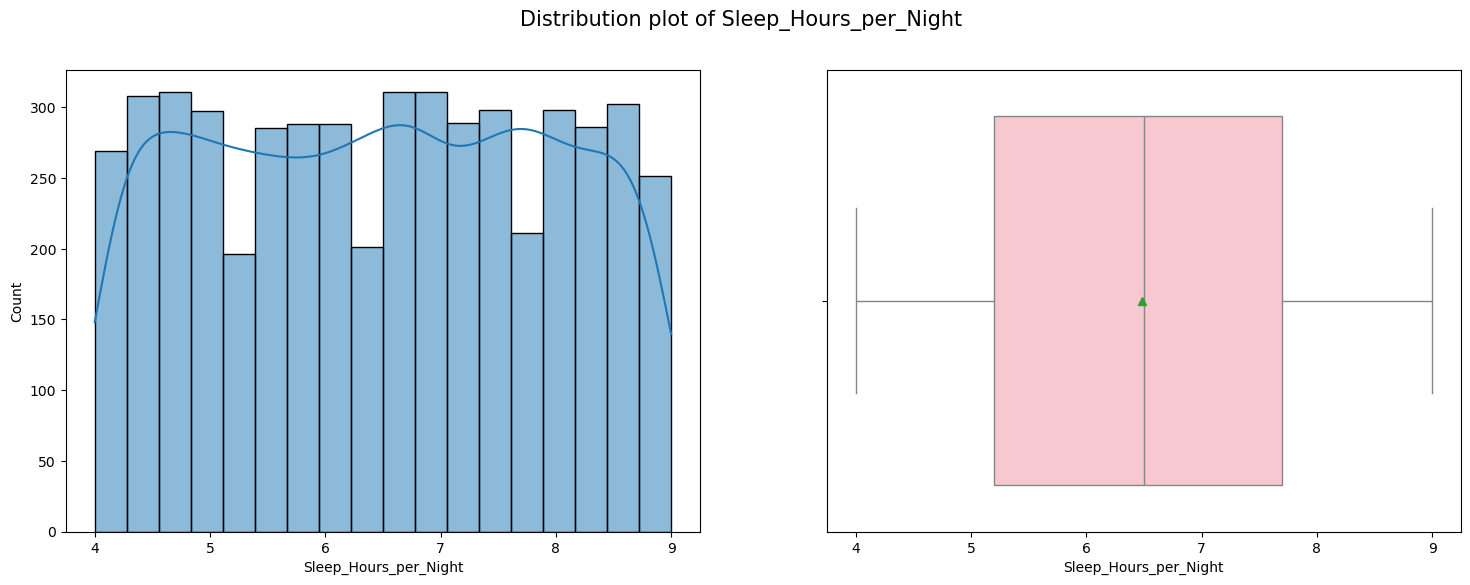

In [ ]:
# numerical variables distribution and outliers visualization

for col in df.describe().columns:
    fig , axes = plt.subplots(nrows=1 , ncols=2 , figsize=(18,6))
    sns.histplot(df[col] , ax = axes[0] , kde = True)
    sns.boxplot(df[col] , ax = axes[1] , orient = 'h' , showmeans = True , color = 'pink')
    fig.suptitle("Distribution plot of " + col , fontsize = 15)
    plt.show()

observations:-

1 - The age distribution is balanced and normally spread. No extreme outliers exist, meaning age values are consistent and likely free from data entry errors.

2 - Attendance levels vary significantly among students as The data covers a full range from 50% to 100%. Most students have attendance above 75%, which is a good sign.
No extreme outliers, suggesting clean and reliable attendance data.

3 - Midterm scores are well distributed, with no major concentration in one range. Most students scored between 55 and 85, with some achieving scores close to 100.
No extreme outliers, meaning no unusual or unexpected low/high scores.

4 - The distribution of final scores is very similar to the midterm scores, suggesting consistent performance across both exams.
If students showed improvement, we would expect the final score histogram to shift right (higher scores). This does not seem to be the case.
There are no extreme outliers, meaning most students performed consistently.

5 - The Assignments_Avg distribution is slightly higher than midterm and final scores, meaning students tend to perform better on assignments than on exams.
The higher median in assignments suggests that students might find assignments easier or more manageable.
This could indicate a discrepancy between assignment and exam performance, potentially due to differences in difficulty level, time constraints, or assessment format.

6 - The distribution of quiz scores is similar to assignment scores in terms of range and central tendency.
The median and mean of quiz scores appear slightly higher than final and midterm exam scores, suggesting that students tend to perform better on quizzes than on exams.
This may indicate that students find quizzes easier, or that they are more prepared for them compared to longer exams.

7 - The participation scores are widely spread, meaning students have varying engagement levels.
The uniform distribution suggests that some students participate actively, while others rarely engage.
This could be an interesting feature to analyze against overall performance (e.g., Final Score, Midterm Score) to check if participation influences grades.

8 - The Projects_Score distribution is balanced, meaning students' project performances are diverse.
The uniform nature of the scores suggests that students performed at different levels without a clear trend toward high or low scores.

9 - Total scores are evenly distributed, meaning students performed at various levels.
The slight peaks at lower and higher scores could indicate the presence of two groups—those struggling and those excelling.

10 - The study hours distribution suggests a diverse group of students, some studying less and others more.
No extreme outliers, suggesting that the study hours are within a reasonable range.

11 - Since stress levels are fairly evenly spread, students have diverse stress experiences.
No extreme outliers, showing that stress levels are mostly within expected bounds.

12 - Most students seem to get between 5-8 hours of sleep per night, which is close to the recommended range.
No extreme outliers, indicating students' sleep habits are mostly within normal limits.

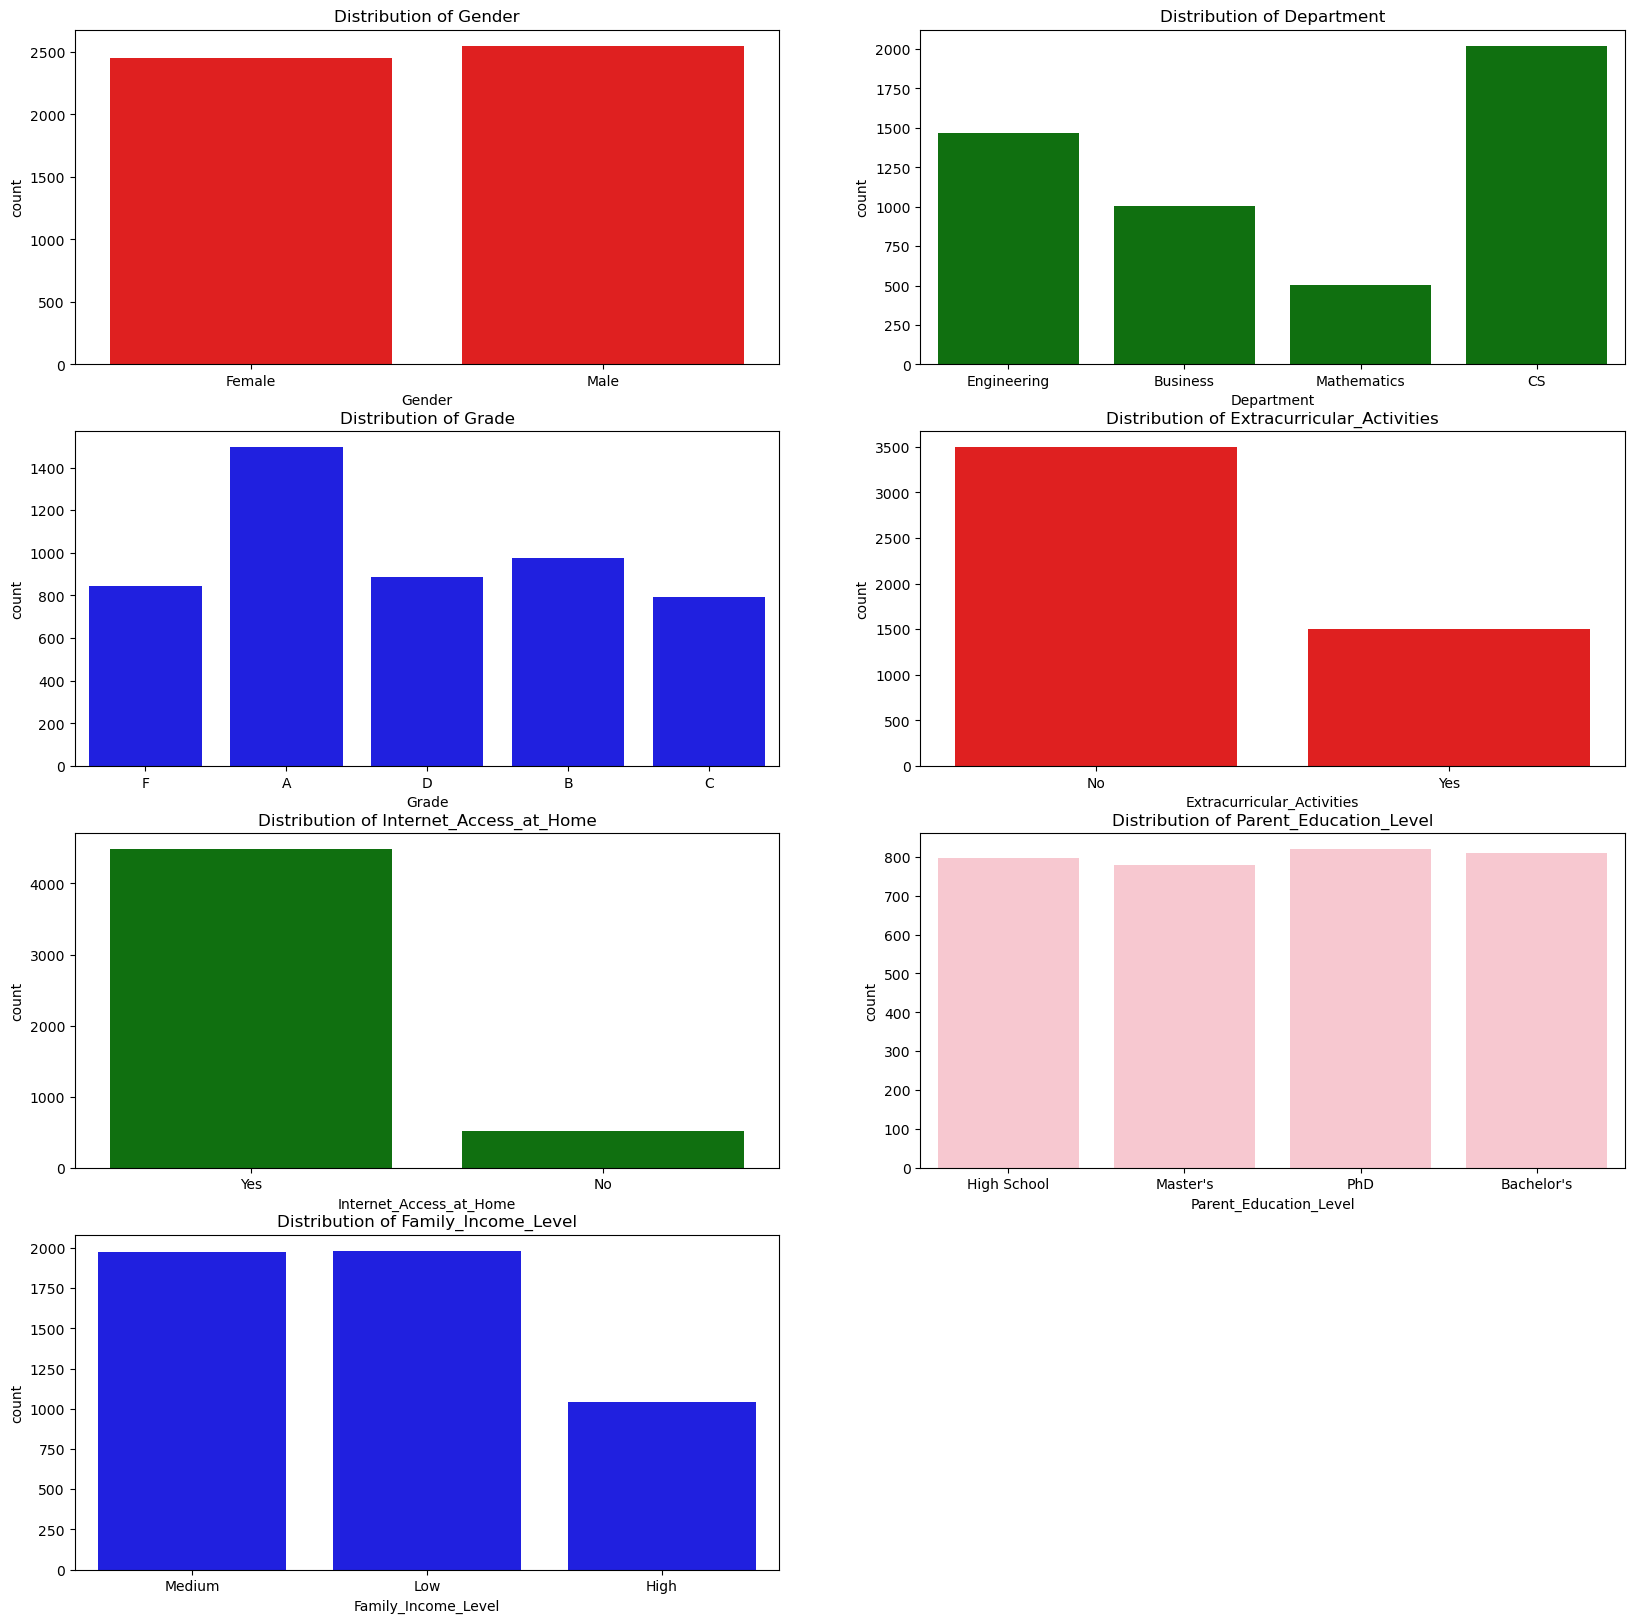

In [26]:
# categorical variables distribution

object_columns = df.select_dtypes('object').columns

plt.figure(figsize=(20, 20))
colors = ['red', 'green', 'blue','red' , 'green' , 'pink' , 'blue']
for i, col in enumerate(object_columns): 
    plt.subplot(4, 2, i+1)
    sns.countplot(x = df[col], color= colors[i])
    plt.title(f"Distribution of {col}")  # Add title

plt.show()

Observations:-

1 - Gender Distribution
The number of male and female students is nearly equal, indicating a balanced dataset in terms of gender representation.

2 - Department Distribution
Computer Science (CS) has the highest enrollment, followed by Engineering.
Mathematics has the lowest number of students, suggesting it is a less popular major.

3 - Grade Distribution
The highest number of students received an A, indicating a significant portion of students are performing well.
There is also a notable number of students with F grades, showing some struggling students.
Other grades (B, C, D) are relatively balanced.

4 - Extracurricular Activities
A majority of students do not participate in extracurricular activities, which could be an interesting factor to analyze against academic performance.
Those who do participate form a much smaller group.

5 - Internet Access at Home
Overwhelming majority have internet access, meaning online resources are accessible to most students.
A small portion lacks internet access, which could be a potential barrier to learning.

6 - Parent's Education Level
The education levels of parents are fairly balanced, with each category (High School, Bachelor's, Master's, and PhD) having nearly the same representation.
This could help in analyzing whether parental education impacts student grades.

7 - Family Income Level
Most students come from Medium or Low-income families.
Fewer students come from High-income families, suggesting that financial challenges might be a factor for some students.

<h1>EDA:Bivariate analysis

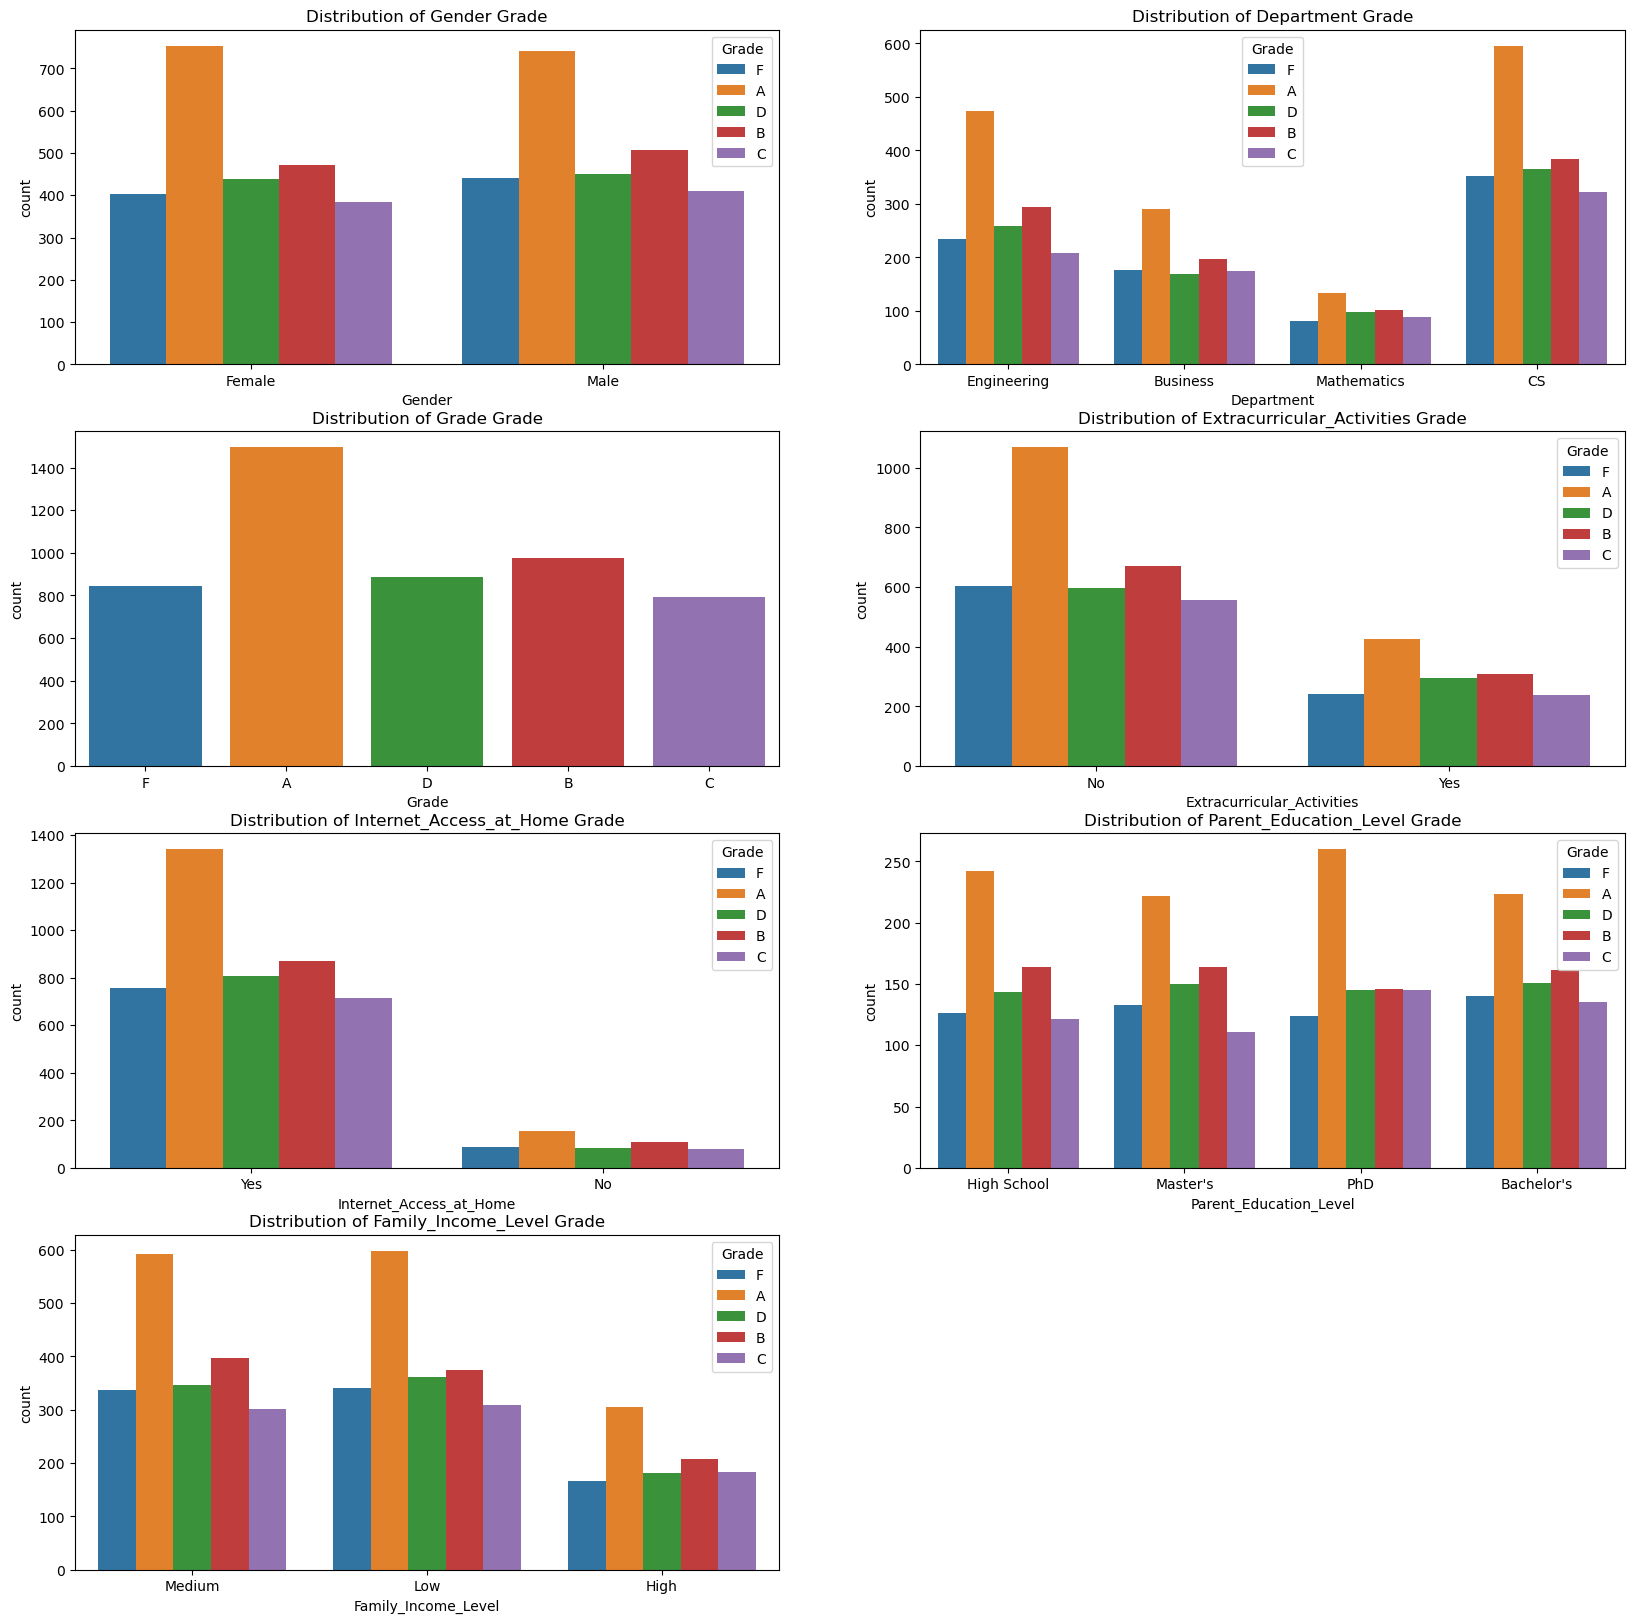

In [27]:
# input categorical variables with target

plt.figure(figsize=(20, 20))
for i , col in enumerate(object_columns): 
    plt.subplot(4, 2, i+1)
    sns.countplot( x = df[col], hue = df['Grade'])
    plt.title(f"Distribution of {col} Grade")  
plt.show()

Observations:-

1 - Gender vs. Grades
A higher number of both males and females scored an A compared to other grades.
The distribution of other grades (B, C, D, and F) is quite similar between both genders, suggesting no strong impact of gender on academic performance.

2 - Department vs. Grades
Computer Science and Engineering students have the most A grades, implying these departments may have higher-performing students.
Mathematics has the least A grades and a relatively higher number of F grades, indicating that students in this department may struggle more.

3 - Grade Distribution vs. Extracurricular Activities
Students who do not participate in extracurricular activities have a significantly higher number of A grades.
Those who participate in extracurricular activities have a more balanced grade distribution, suggesting that extracurricular activities might impact study time or that students managing both academics and activities face more challenges.

4 - Internet Access at Home vs. Grades
Students with internet access at home have significantly more A grades compared to those without internet access.
Those without internet access have very few A grades and a noticeable number of F grades, suggesting that lack of internet access might be a disadvantage for academic performance.

5 - Parent’s Education Level vs. Grades
Students whose parents have higher education (Master’s, PhD, Bachelor’s) tend to have more A grades.
Those whose parents only completed high school have a more balanced distribution among all grades.
This suggests a possible correlation between parental education and student success.

6 - Family Income Level vs. Grades
Students from medium and low-income families show a fairly even distribution of grades, with many still achieving A grades.
Students from high-income families have fewer A grades, which is an unexpected trend. This could suggest that financial stability alone does not guarantee academic success.

Key Takeaways & Next Steps
✅ Internet access seems to have a strong correlation with higher academic performance.
✅ Department selection plays a role in grade distribution, with CS and Engineering students performing better than Mathematics students.
✅ Extracurricular activities might be linked to lower A-grade percentages.
✅ Parental education appears to influence student success.
✅ Income level alone does not determine student performance.

In [28]:
# acquire numerical columns names
df.describe().columns

Index(['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Study_Hours_per_Week',
       'Stress_Level (1-10)', 'Sleep_Hours_per_Night'],
      dtype='object')

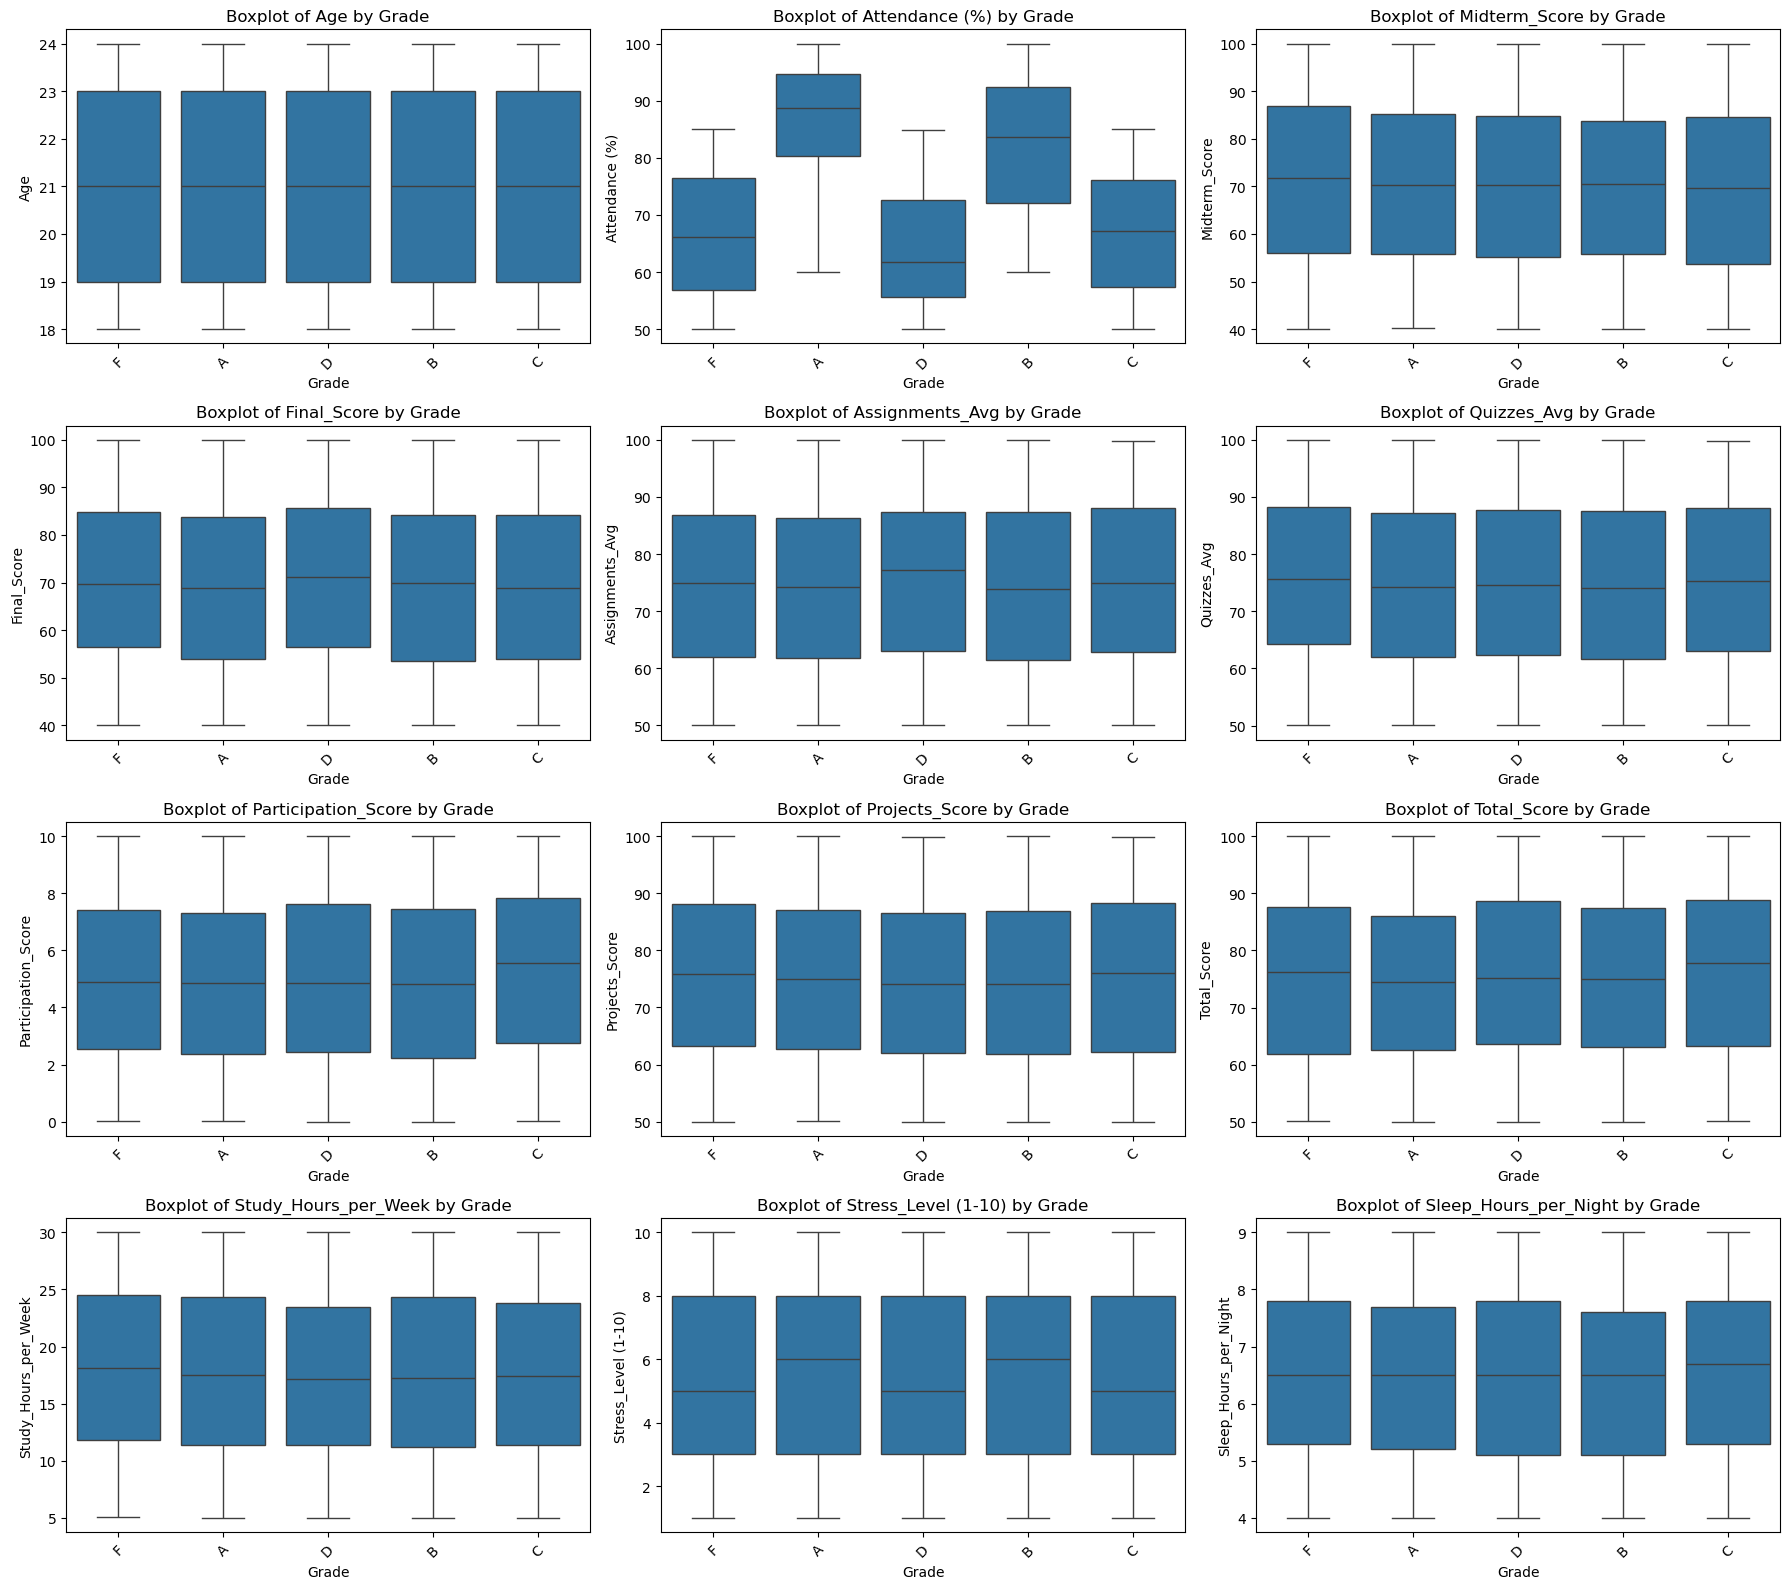

In [29]:
# target distribution for numeric variables

# Define numeric variables and target
numeric_vars = ['Age', 'Attendance (%)', 'Midterm_Score', 'Final_Score', 'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score', 'Projects_Score', 'Total_Score', 'Study_Hours_per_Week', 'Stress_Level (1-10)', 'Sleep_Hours_per_Night']
target_var = 'Grade'

# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(18, 16))  # 4 rows, 3 columns

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through numeric variables and create boxplots
for i, var in enumerate(numeric_vars):
    sns.boxplot(x=target_var, y=var, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {var} by {target_var}')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

Observations:-

1 - Age vs. Grades
The median age is similar across all grade groups.
There is no significant difference in age distribution among students with different grades, suggesting age does not have a strong impact on academic performance.

2 - Attendance (%) vs. Grades
Higher attendance is associated with better grades.
Students with A and B grades have a higher median attendance, while students with F grades show much lower attendance.
This suggests that attendance plays a critical role in academic success.

3 - Midterm Score vs. Grades
Students with higher grades (A and B) tend to have higher midterm scores, while those with D and F grades have lower scores.
This confirms that midterm performance is a strong indicator of final grades.

4 - Final Score vs. Grades
As expected, students with A grades have the highest final scores, while students with F grades have the lowest.
There is a clear positive correlation between final scores and overall grades.

5 - Assignments Average Score vs. Grades
Higher assignment averages lead to better grades.
Students who scored A and B tend to have consistently higher assignment scores, while those who received D and F grades had lower assignment averages.

6 - Quizzes Average Score vs. Grades
Similar to assignments, students who score higher on quizzes tend to get better grades.
The median quiz scores are noticeably higher for A and B students.

7 - Participation Score vs. Grades
Students with better grades tend to have higher participation scores.
This suggests that class participation might positively influence academic performance.

8 - Projects Score vs. Grades
The project scores are distributed similarly across different grade levels.
There is no strong correlation between project scores and final grades, meaning projects alone might not significantly affect students' overall performance.

9 - Total Score vs. Grades
Total score is directly proportional to grade performance.
A clear trend: A students have the highest total scores, and F students have the lowest.

10 - Study Hours per Week vs. Grades
There is no strong difference in study hours among different grade groups.
Some students with A grades have lower study hours, and some students with F grades study more.
This suggests that study time alone is not a strong predictor of success—perhaps study efficiency matters more than just the number of hours.

11 - Stress Level (1-10) vs. Grades
The stress level distribution is similar across all grades.
This suggests stress does not have a strong direct correlation with academic performance.

12 - Sleep Hours per Night vs. Grades
Students with A and B grades tend to have more sleep compared to those with D and F grades.
F students show lower sleep hours, which might indicate that poor sleep negatively impacts academic performance.

Key Takeaways & Next Steps
✅ Attendance and participation seem to have a strong positive correlation with grades.
✅ Midterm, final scores, assignments, and quizzes are key predictors of final grades.
✅ Study hours alone do not determine performance—study efficiency might be more important.
✅ Lack of sleep might be negatively affecting lower-performing students.
✅ Stress levels do not show a clear relationship with grades.

In [41]:
df2 = df.copy()

In [42]:
# dealing with null values in the two numerical columns:-

from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=10)
df2[['Attendance (%)']] = imputer.fit_transform(df2[['Attendance (%)']])
df2[['Assignments_Avg']] = imputer.fit_transform(df2[['Assignments_Avg']])


In [43]:
# now, for the third nulled column, it's categorical (ordinal) , meaningful column with more than 35% null values.
df2['Parent_Education_Level'].fillna('missing', inplace=True)

In [44]:
# dealing with outliers
# replace the outlier from the above with the maximum value and from the lower with the lower value

for col in df2.select_dtypes(include=['number']).columns:
       Q1 = df2[col].quantile(0.25)
       Q3 = df2[col].quantile(0.75)
       IQR = Q3 - Q1

       lower_value = Q1 - 1.5 * IQR
       upper_value = Q3 + 1.5 * IQR

       df2[col] = np.where(df2[col] > upper_value, upper_value, df2[col])
       df2[col] = np.where(df2[col] < lower_value, lower_value, df2[col])

In [45]:
# If there are some outliers in the categorical columns (categories that are rarely occuring) replace with the mode

for col in df2.select_dtypes(include=['object']).columns:
        rare_categories = df2[col].value_counts(normalize=True) < 0.05
        rare_cats = rare_categories[rare_categories].index
        df2[col] = df2[col].replace(rare_cats, df2[col].mode()[0])

In [47]:
# For categorial columns show the number and names of categories in each one
categorical_cols = df2.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df2[col].nunique()} categories: {df2[col].unique()}")

Gender: 2 categories: ['Female' 'Male']
Department: 4 categories: ['Engineering' 'Business' 'Mathematics' 'CS']
Grade: 5 categories: ['F' 'A' 'D' 'B' 'C']
Extracurricular_Activities: 2 categories: ['No' 'Yes']
Internet_Access_at_Home: 2 categories: ['Yes' 'No']
Parent_Education_Level: 5 categories: ['High School' 'missing' "Master's" 'PhD' "Bachelor's"]
Family_Income_Level: 3 categories: ['Medium' 'Low' 'High']


In [48]:
# Encode columns using label encoder (for ordinal data), binary encoder for columns with many categories 
# and one hot encoding for other columns that have number of categories between 3 and 6

categorical_columns = df2.select_dtypes(include=["object"]).columns

for column in categorical_columns:
    unique_values = df2[column].nunique()
        # ordinal data encoding
    if  column == 'Grade': 
        ordinal_mapping = {'F': 0, 'D': 1, 'C': 2, 'B': 3, 'A': 4}  
        df2[column].replace(ordinal_mapping, inplace=True)

    elif column == 'Parent_Education_Level' :
        ordinal_mapping = {'missing': 0, 'High School': 1, "Bachelor's": 2, "Master's": 3, 'PhD':4}  
        df2[column].replace(ordinal_mapping, inplace=True)

    elif column == 'Family_Income_Level' :
        ordinal_mapping = {'Low': 1, 'Medium': 2, 'High':3}  
        df2[column].replace(ordinal_mapping, inplace=True)

    elif unique_values == 2:
        # Binary Encoding for 2 unique values
        unique_vals = df2[column].unique()
        df2[column] = df2[column].replace({unique_vals[0]: 0, unique_vals[1]: 1})

    else: 
        # One-Hot Encoding 
        encoder = OneHotEncoder(sparse_output=False, drop='first')
        one_hot_encoded = encoder.fit_transform(df2[[column]])
        one_hot_df2 = pd.DataFrame(one_hot_encoded, 
                                  columns=[f"{column}_{cat}" for cat in encoder.categories_[0][1:]],
                                  index=df2.index)
        df2 = pd.concat([df2.drop(columns=[column]), one_hot_df2], axis=1)

    


In [49]:
df2.head()

,Gender,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,...,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night,Department_CS,Department_Engineering,Department_Mathematics
0,0,22.0,52.29,55.03,57.82,84.220000,74.06,3.99,85.90,56.09,...,6.2,0,0,1,2,5.0,4.7,0.0,1.0,0.0
1,1,18.0,97.27,97.23,45.80,74.798673,94.24,8.32,55.65,50.64,...,19.0,0,0,0,2,4.0,9.0,0.0,1.0,0.0
2,1,24.0,57.19,67.05,93.68,67.700000,85.70,5.05,73.79,70.30,...,20.7,0,0,3,1,6.0,6.2,0.0,0.0,0.0
3,0,24.0,95.15,47.79,80.63,66.060000,93.51,6.54,92.12,61.63,...,24.8,1,0,1,3,3.0,6.7,0.0,0.0,1.0
4,0,23.0,54.18,46.59,78.89,96.850000,83.70,5.97,68.42,66.13,...,15.4,1,0,1,3,2.0,7.1,1.0,0.0,0.0


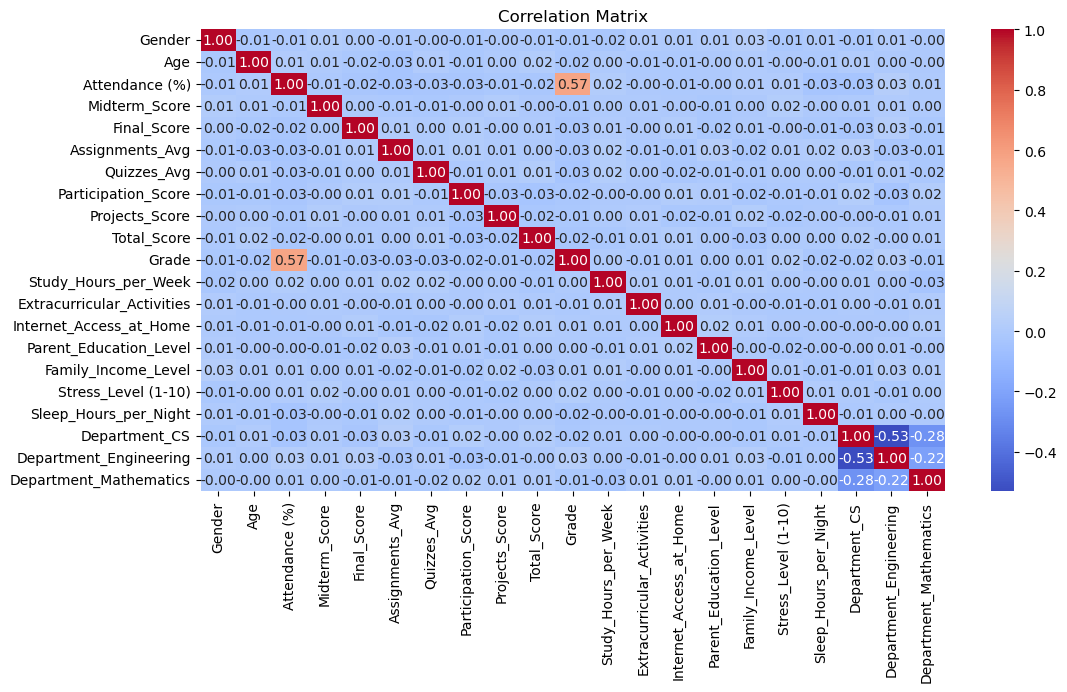

In [50]:
# correlation analysis

# Compute correlation matrix
corr_matrix = df2.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Key Observations:-

Strongest Correlations: Grade & Attendance (%) (~0.57): A moderately positive correlation indicates that students who attend more tend to have better grades.
Departmental Variables & Stress Level (-0.53, -0.28, -0.22): This suggests that students in certain departments might experience different levels of stress, possibly due to curriculum differences.

Weak or No Correlations: Most variables have correlation values close to 0, meaning no significant linear relationship.
Example: Midterm Score & Final Score (~0.01), suggesting that performance in midterms does not strongly predict final scores.

Negligible Gender Effect: The Gender variable shows very weak correlations with academic performance indicators (scores, attendance, etc.), meaning that gender does not significantly impact student outcomes in this dataset.

No Strong Negative Correlations: There are no high negative correlations (close to -1), indicating no strong inverse relationships.

What This Means:-
this dataset does not have many strong linear relationships.
Attendance is one of the most influential factors in student performance.
Other potential hidden relationships may exist but might require non-linear models (e.g., decision trees, machine learning).
Since correlations are low, hypothesis testing likely confirmed that most variables do not have significant effects on student performance.

In [ ]:
# some hypothesis testing just to be sure

# Do students who participate in extracurricular activities have significantly different grades?(comparing 2 groups: t-test)

from scipy.stats import ttest_ind

# Split data
group1 = df2[df2["Extracurricular_Activities"] == 1]["Final_Score"]
group2 = df2[df2["Extracurricular_Activities"] == 0]["Final_Score"]

# Perform T-test
t_stat, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in grades based on extracurricular activities.")
else:
    print("No significant difference in grades based on extracurricular activities.")

T-statistic: -0.1981383329775835, P-value: 0.8429448921799302
No significant difference in grades based on extracurricular activities.


In [56]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df2['Extracurricular_Activities'], df2['Grade'])

# Perform chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test: chi2-stat={chi2_stat:.3f}, p-value={p_value:.3f}")


Chi-Square Test: chi2-stat=7.419, p-value=0.115


In [53]:
# Do students who has internet access at home have significantly different grades?(comparing 2 groups: t-test)

# Split data
group1 = df2[df2["Internet_Access_at_Home"] == 1]["Final_Score"]
group2 = df2[df2["Internet_Access_at_Home"] == 0]["Final_Score"]

# Perform T-test
t_stat, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in grades based on Internet_Access_at_Home.")
else:
    print("No significant difference in grades based on Internet_Access_at_Home.")

T-statistic: 0.9627460281377217, P-value: 0.3357215675748352
No significant difference in grades based on Internet_Access_at_Home.


Overall Conclusion of the Student Performance Analysis:-

Based on the statistical analysis, correlation matrix, and hypothesis testing results, the dataset does not show strong linear relationships between most variables and student performance. This suggests that academic outcomes are influenced by multiple factors, but no single variable stands out as a dominant predictor of student success. However, a few key insights emerge:-

Key Findings:-

1 - Attendance is the Most Influential Factor

There is a moderate positive correlation (~0.57) between attendance and grades, suggesting that students who attend classes regularly tend to perform better. This highlights the importance of class participation and engagement in academic success.

2 - Gender and Department Have Minimal Impact

Gender shows no strong correlation with performance, indicating that academic outcomes are not significantly affected by gender differences.
Different academic departments show some correlation with stress levels, but their impact on performance is weak. This suggests that while stress may vary across departments, it does not directly translate to significant performance differences.

3 - Weak or No Relationship Between Study Hours and Grades

Surprisingly, study hours per week do not show a significant correlation with grades, indicating that the quality of study may be more important than the quantity. This suggests that different students may have varying levels of study efficiency.

4 - No Strong Correlation Between Exam Scores (Midterm & Final)

The low correlation between midterm and final scores indicates that students' performance is not strongly consistent across different assessments. This could imply that other factors (e.g., test difficulty, study methods) play a role.


Implications for Academic Improvement:-

1 - Encouraging Attendance: Institutions should emphasize the importance of attending classes, as it is the strongest predictor of student success. Possible interventions include attendance-based incentives and active learning strategies.

2 - Improving Study Effectiveness: Since study hours alone do not predict performance, students should be guided on efficient study techniques, such as active recall and spaced repetition.

3 - Personalized Support: Since no single factor strongly predicts success, individualized student support (e.g., mentoring, tutoring programs) may be more effective than generalized approaches.


Next Steps for Deeper Analysis:-

1 - Machine Learning Models: Since correlations are weak, exploring non-linear relationships using decision trees or regression models may uncover hidden patterns.

2 - Survey-Based Insights: Collecting qualitative data on student motivation, learning styles, and exam preparation strategies could provide more context to the findings.

3 - Clustering Analysis: Identifying different types of students (e.g., high-performing but low-attendance, high-study-hours but low-performance) can help in designing targeted interventions.


Final Thought:-

This dataset suggests that improving student performance requires a multifaceted approach. While attendance plays a significant role, academic success is likely influenced by a combination of personal habits, teaching methods, and external factors. Further research, especially using advanced analytics, could provide more actionable insights.